# Exploratory Data Analysis of the Waymo Open Dataset

## Scene Attributes

This Jupyter Notebook explores Scene Data extracted from the labels of approximately 8,000 frames of the Waymo Open Dataset. 


In [1]:
import os
import tensorflow as tf
import math
import numpy as np
import pandas as pd
import itertools
import collections
from scipy import stats

In [4]:
%matplotlib inline
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [5]:
frames_df = pd.read_csv('frames8k.csv')

In [6]:
frames_df = frames_df.drop(['unknown_count'],axis=1)

In [67]:
frames_df['all_object_count'] = frames_df['pedestrian_count'] + frames_df['cyclist_count'] + frames_df['vehicle_count']
count_columns = ['cyclist_count', 'pedestrian_count', 'sign_count', 'vehicle_count']

In [68]:
frames_df.head()

,Unnamed: 0,cyclist_count,location,pedestrian_count,sign_count,time_of_day,vehicle_count,weather,all_object_count
0,0,0.0,location_sf,44.0,39.0,Day,60.0,sunny,104.0
1,1,1.0,location_sf,40.0,33.0,Day,23.0,sunny,64.0
2,2,8.0,location_sf,27.0,21.0,Day,50.0,sunny,85.0
3,3,0.0,location_sf,4.0,14.0,Day,11.0,sunny,15.0
4,4,0.0,location_sf,0.0,2.0,Day,17.0,sunny,17.0


33.0 234.0
27.0 163.0
0.32597644141351517 0.0 11.0


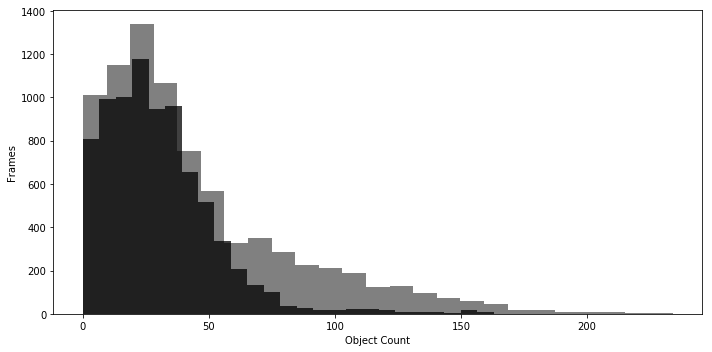

In [74]:
frames_df['all_object_count'].hist(bins=25, grid=False, figsize=(10,5), color='grey')
frames_df['vehicle_count'].hist(bins=25, grid=False, figsize=(10,5), alpha=0.75, color='black')
plt.xlabel('Object Count')
plt.ylabel('Frames')
plt.tight_layout()

print(frames_df['all_object_count'].median(), frames_df['all_object_count'].max())
print(frames_df['vehicle_count'].median(), frames_df['vehicle_count'].max())
print(frames_df['cyclist_count'].mean(), frames_df['cyclist_count'].median(), frames_df['cyclist_count'].max())

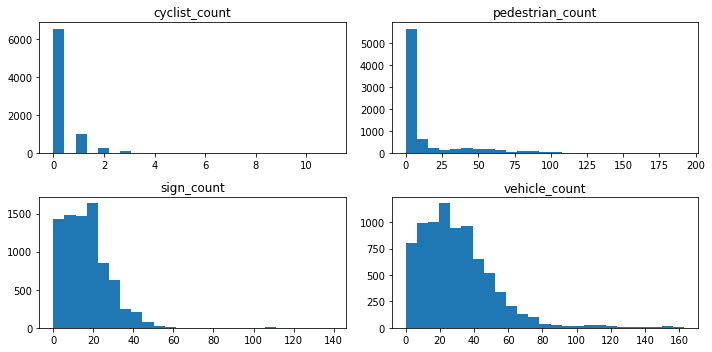

In [47]:

frames_df[count_columns].hist(bins=25, grid=False, figsize=(10,5))
plt.tight_layout()

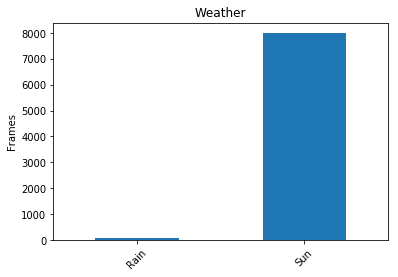

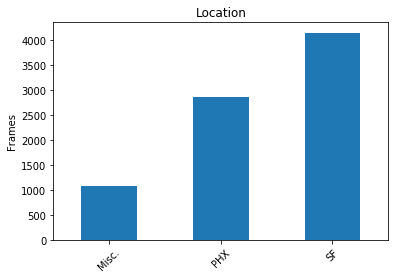

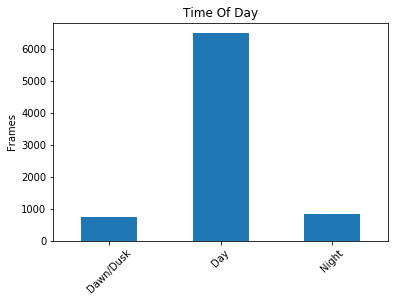

In [75]:
def plot_bar_counts(df, group_column, count_column, labels):
    counts = df.groupby(group_column).count()

    count_column_title = count_column.replace('_', ' ').title()
    group_column_title = group_column.replace('_', ' ').title()

    fig, ax = plt.subplots()
    counts[count_column].plot(kind='bar')
    plt.title(group_column_title)
    plt.xlabel('')
    plt.ylabel('Frames')
    ax.set_xticklabels(labels, rotation=45)
    plt.show;

plot_bar_counts(frames_df, 'weather', 'Unnamed: 0', ['Rain', 'Sun'])
plt.savefig('weather.png',bbox_inches='tight')
plot_bar_counts(frames_df, 'location', 'Unnamed: 0',['Misc.', 'PHX', 'SF'])
plt.savefig('location',bbox_inches='tight');
plot_bar_counts(frames_df, 'time_of_day', 'Unnamed: 0', ['Dawn/Dusk', 'Day', 'Night'])
plt.savefig('time.png',bbox_inches='tight');

In [14]:
print('Total number of rainy days: {}'.format(frames_df[frames_df['weather'] == 'rain'].shape[0]))

Total number of rainy days: 67


In [15]:
frames_df.groupby('location').mean().round()[count_columns]

,cyclist_count,pedestrian_count,sign_count,vehicle_count
location,,,,
location_other,0.0,3.0,18.0,30.0
location_phx,0.0,2.0,12.0,23.0
location_sf,0.0,25.0,19.0,36.0


In [16]:
frames_df.groupby('time_of_day').mean().round()[count_columns]

,cyclist_count,pedestrian_count,sign_count,vehicle_count
time_of_day,,,,
Dawn/Dusk,0.0,5.0,13.0,27.0
Day,0.0,16.0,17.0,31.0
Night,0.0,8.0,16.0,27.0


In [17]:
frames_df.groupby('weather').mean().round()[count_columns]

,cyclist_count,pedestrian_count,sign_count,vehicle_count
weather,,,,
rain,0.0,0.0,5.0,19.0
sunny,0.0,14.0,17.0,31.0


In [18]:
frames_df.groupby('location').max()[count_columns]

,cyclist_count,pedestrian_count,sign_count,vehicle_count
location,,,,
location_other,10.0,40.0,62.0,156.0
location_phx,4.0,92.0,139.0,163.0
location_sf,11.0,192.0,64.0,154.0


In [19]:
frames_df.groupby('weather').max()[count_columns]

,cyclist_count,pedestrian_count,sign_count,vehicle_count
weather,,,,
rain,0.0,2.0,27.0,106.0
sunny,11.0,192.0,139.0,163.0


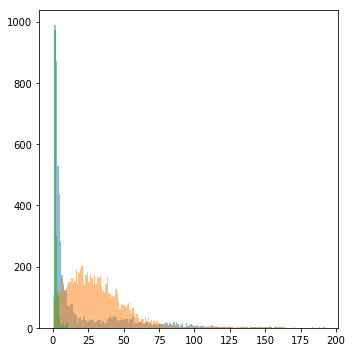

In [20]:
cyclist_frames = frames_df[frames_df['cyclist_count'] != 0]
pedestrian_frames = frames_df[frames_df['pedestrian_count'] != 0]

ped_bins = int(pedestrian_frames['pedestrian_count'].max() - pedestrian_frames['pedestrian_count'].min())
veh_bins = int(frames_df['vehicle_count'].max() - frames_df['vehicle_count'].min())
cyl_bins = int(cyclist_frames['cyclist_count'].max() - cyclist_frames['cyclist_count'].min())

pedestrian_frames['pedestrian_count'].hist(bins=ped_bins, figsize=(5, 5), grid=False, alpha=0.5)
frames_df['vehicle_count'].hist(bins=veh_bins, figsize=(5, 5), grid=False, alpha=0.5)
cyclist_frames['cyclist_count'].hist(bins=cyl_bins, figsize=(5, 5), grid=False, alpha=0.5)
plt.tight_layout()

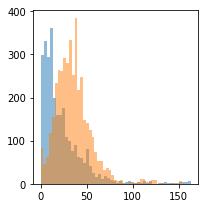

In [80]:
phx_frames = frames_df[frames_df['location'] == 'location_phx']
sf_frames = frames_df[frames_df['location'] == 'location_sf']

veh_bins = 50

phx_frames['vehicle_count'].hist(bins=veh_bins, figsize=(3, 3), grid=False, alpha=0.5)
sf_frames['vehicle_count'].hist(bins=veh_bins, figsize=(3, 3), grid=False, alpha=0.5)
plt.tight_layout()

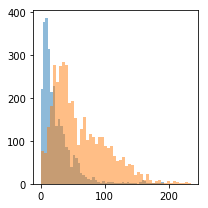

In [81]:
phx_frames['all_object_count'].hist(bins=veh_bins, figsize=(3, 3), grid=False, alpha=0.5)
sf_frames['all_object_count'].hist(bins=veh_bins, figsize=(3, 3), grid=False, alpha=0.5)
plt.tight_layout()

In [82]:
def count_winning_pairs(sample_1, sample_2):
    sample_1, sample_2 = np.array(sample_1), np.array(sample_2)
    n_total_wins = 0
    for x in sample_1:
        n_wins = np.sum(x > sample_2) + 0.5*np.sum(x == sample_2)
        n_total_wins += n_wins
    return n_total_wins

In [83]:
count_winning_pairs(phx_frames['vehicle_count'], sf_frames['vehicle_count'])

3220506.0

In [106]:
res = stats.mannwhitneyu(frames_df['all_object_count'].sample(100), frames_df['vehicle_count'].sample(100))
print("p-value for Veh Count SF < Phx: {:2.6f}".format(res.pvalue))

p-value for Veh Count SF < Phx: 0.008939


In [100]:
matt_heights = [1.5, 0.9, 0.9, 1.3, 2.1, 1.9, 1.6, 1.4, 2.3, 1.0, 1.5, 0.9, 2.1,
                1.3, 1.4, 2.1, 1.2, 1.7, 1.7, 2.0, 1.6, 1.2, 1.6, 1.7, 1.5]
nick_heights = [1.9, 1.8, 1.3, 2.3, 1.7, 1.9, 2.7, 2.1, 2.2, 1.5, 1.8, 2.0, 1.1,
                1.7, 2.1, 1.5, 2.3, 1.5, 2.0, 2.4, 1.5, 1.4, 1.6, 1.8, 1.0]

In [94]:
res = stats.mannwhitneyu(matt_heights, nick_heights)
print("p-value for Veh Count SF < Phx: {:2.6f}".format(res.pvalue))

p-value for Veh Count SF < Phx: 0.015356
